# Introduction to SQL

In [1]:
import pandas as pd
import sqlalchemy

Create a Database Engine
An engine is a tool that can communicate with our database. Think of it as a smart connection that knows the dialect, or type, of database that we have and how to connect and interact with it.

First, we need to define a connection string to connect to our database. The connection string tells the engine the type of database that we’re using and other important connection details, like a password, server name, port number, or IP address.



In [2]:
# Create a temporary sqlite database
database_connection_string = 'sqlite:///'
engine = sqlalchemy.create_engine(database_connection_string)
engine

Engine(sqlite:///)

In [3]:
engine.table_names()

<ipython-input-3-d72bc75a6b62>:1: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  engine.table_names()


[]

In [4]:
stocks_dataframe = pd.DataFrame({'AAPL': [1, 2], 'GOOG': [3, 4]})
stocks_dataframe

,AAPL,GOOG
0,1,3
1,2,4


In [9]:
stocks_dataframe.to_sql('stocks', engine,  index=False, if_exists='replace')



2

In [7]:
engine.table_names()

<ipython-input-7-d72bc75a6b62>:1: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  engine.table_names()


['stocks']

Do you wonder where the database is and how to get data from it? Currently, your SQLite database resides in your computer’s memory—but only temporarily. As soon as you close your Jupyter notebook, the database will disappear. If you want to save the database to access it in the future, you can specify a file name, such as sqlite:///mydatabase.db. This will save the database information to a file named mydatabase.db, which will reside on your computer's hard drive. But for now, it’s easier to use the temporary in-memory database, sqlite:///.

In [11]:
sql_stocks_df = pd.read_sql_table('stocks', con=engine)
sql_stocks_df

,AAPL,GOOG
0,1,3
1,2,4


In [12]:
database_connection_string = 'sqlite:///'
# Create the database engine
engine = sqlalchemy.create_engine(
    database_connection_string,
    echo=True
)

In [13]:
stocks_dataframe.to_sql('stocks', engine, index=False, if_exists='replace')

2022-05-05 08:21:16,119 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("stocks")
2022-05-05 08:21:16,120 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-05-05 08:21:16,122 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("stocks")
2022-05-05 08:21:16,122 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-05-05 08:21:16,124 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2022-05-05 08:21:16,125 INFO sqlalchemy.engine.Engine 
CREATE TABLE stocks (
	"AAPL" BIGINT, 
	"GOOG" BIGINT
)


2022-05-05 08:21:16,126 INFO sqlalchemy.engine.Engine [no key 0.00096s] ()
2022-05-05 08:21:16,128 INFO sqlalchemy.engine.Engine COMMIT
2022-05-05 08:21:16,129 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2022-05-05 08:21:16,130 INFO sqlalchemy.engine.Engine INSERT INTO stocks ("AAPL", "GOOG") VALUES (?, ?)
2022-05-05 08:21:16,130 INFO sqlalchemy.engine.Engine [generated in 0.00052s] ((1, 3), (2, 4))
2022-05-05 08:21:16,131 INFO sqlalchemy.engine.Engine COMMIT


2

In [14]:
#Create a Table via a Raw SQL Statement
create_table = """
CREATE TABLE stocks (
    "AAPL" BIGINT,
    "GOOG" BIGINT
)
"""
create_table

'\nCREATE TABLE stocks (\n    "AAPL" BIGINT,\n    "GOOG" BIGINT\n)\n'

In [15]:
create_table = """
CREATE TABLE delicious_stocks (
    "EAT" BIGINT,
    "CAKE" BIGINT
)
"""

In [16]:
engine.execute(create_table)

2022-05-05 08:27:50,382 INFO sqlalchemy.engine.Engine 
CREATE TABLE delicious_stocks (
    "EAT" BIGINT,
    "CAKE" BIGINT
)

2022-05-05 08:27:50,383 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-05-05 08:27:50,385 INFO sqlalchemy.engine.Engine COMMIT


In [17]:
engine.table_names()

2022-05-05 08:28:15,942 INFO sqlalchemy.engine.Engine SELECT name FROM sqlite_master WHERE type='table' ORDER BY name
2022-05-05 08:28:15,943 INFO sqlalchemy.engine.Engine [raw sql] ()


<ipython-input-17-d72bc75a6b62>:1: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  engine.table_names()


['delicious_stocks', 'stocks']

In [18]:
pd.read_sql_table('delicious_stocks', con=engine)

2022-05-05 08:28:31,092 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("delicious_stocks")
2022-05-05 08:28:31,093 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-05-05 08:28:31,095 INFO sqlalchemy.engine.Engine PRAGMA main.table_xinfo("delicious_stocks")
2022-05-05 08:28:31,096 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-05-05 08:28:31,097 INFO sqlalchemy.engine.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = ? AND type = 'table'
2022-05-05 08:28:31,098 INFO sqlalchemy.engine.Engine [raw sql] ('delicious_stocks',)
2022-05-05 08:28:31,099 INFO sqlalchemy.engine.Engine PRAGMA main.foreign_key_list("delicious_stocks")
2022-05-05 08:28:31,100 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-05-05 08:28:31,101 INFO sqlalchemy.engine.Engine PRAGMA temp.foreign_key_list("delicious_stocks")
2022-05-05 08:28:31,102 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-05-05 08:28:31,103 INFO sqlalchemy.engine.Engine SELECT sql 

,EAT,CAKE


In [19]:
insert_data = """
INSERT INTO delicious_stocks ("EAT", "CAKE") VALUES (?, ?)
"""

In [20]:
engine.execute(insert_data, ((10, 30), (20, 40)))

2022-05-05 08:29:06,505 INFO sqlalchemy.engine.Engine 
INSERT INTO delicious_stocks ("EAT", "CAKE") VALUES (?, ?)

2022-05-05 08:29:06,505 INFO sqlalchemy.engine.Engine [raw sql] ((10, 30), (20, 40))
2022-05-05 08:29:06,507 INFO sqlalchemy.engine.Engine COMMIT


In [21]:
pd.read_sql_table('delicious_stocks', con=engine)

2022-05-05 08:29:21,334 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("delicious_stocks")
2022-05-05 08:29:21,335 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-05-05 08:29:21,336 INFO sqlalchemy.engine.Engine PRAGMA main.table_xinfo("delicious_stocks")
2022-05-05 08:29:21,337 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-05-05 08:29:21,338 INFO sqlalchemy.engine.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = ? AND type = 'table'
2022-05-05 08:29:21,339 INFO sqlalchemy.engine.Engine [raw sql] ('delicious_stocks',)
2022-05-05 08:29:21,340 INFO sqlalchemy.engine.Engine PRAGMA main.foreign_key_list("delicious_stocks")
2022-05-05 08:29:21,341 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-05-05 08:29:21,342 INFO sqlalchemy.engine.Engine PRAGMA temp.foreign_key_list("delicious_stocks")
2022-05-05 08:29:21,343 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-05-05 08:29:21,343 INFO sqlalchemy.engine.Engine SELECT sql 

,EAT,CAKE
0,10,30
1,20,40


In [22]:
# Read data from the sqlalchemy table
read_all_data = """
SELECT "EAT", "CAKE" FROM delicious_stocks
"""
engine.execute(read_all_data)

2022-05-05 08:44:44,844 INFO sqlalchemy.engine.Engine 
SELECT "EAT", "CAKE" FROM delicious_stocks

2022-05-05 08:44:44,844 INFO sqlalchemy.engine.Engine [raw sql] ()


In [23]:
results = engine.execute(read_all_data)
for row in results:
    print(row)

2022-05-05 08:45:14,065 INFO sqlalchemy.engine.Engine 
SELECT "EAT", "CAKE" FROM delicious_stocks

2022-05-05 08:45:14,066 INFO sqlalchemy.engine.Engine [raw sql] ()
(10, 30)
(20, 40)


In [24]:
results = engine.execute(read_all_data)
list(results)

2022-05-05 08:45:29,814 INFO sqlalchemy.engine.Engine 
SELECT "EAT", "CAKE" FROM delicious_stocks

2022-05-05 08:45:29,815 INFO sqlalchemy.engine.Engine [raw sql] ()


[(10, 30), (20, 40)]

In [25]:
read_all_data = """
SELECT * FROM delicious_stocks
"""
results = engine.execute(read_all_data)
list(results)

2022-05-05 08:45:49,450 INFO sqlalchemy.engine.Engine 
SELECT * FROM delicious_stocks

2022-05-05 08:45:49,451 INFO sqlalchemy.engine.Engine [raw sql] ()


[(10, 30), (20, 40)]

In [26]:
# Update data

update_cake = """
UPDATE delicious_stocks
SET CAKE = 100
WHERE CAKE = 40
"""
engine.execute(update_cake)

2022-05-05 08:46:26,466 INFO sqlalchemy.engine.Engine 
UPDATE delicious_stocks
SET CAKE = 100
WHERE CAKE = 40

2022-05-05 08:46:26,467 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-05-05 08:46:26,468 INFO sqlalchemy.engine.Engine COMMIT


In [27]:
read_all_data = """
SELECT * FROM delicious_stocks
"""
results = engine.execute(read_all_data)
list(results)

2022-05-05 08:57:01,568 INFO sqlalchemy.engine.Engine 
SELECT * FROM delicious_stocks

2022-05-05 08:57:01,569 INFO sqlalchemy.engine.Engine [raw sql] ()


[(10, 30), (20, 100)]

In [28]:
# Delete information 
delete_eat = """
DELETE FROM delicious_stocks
WHERE EAT = 20
"""
engine.execute(delete_eat)

2022-05-05 08:57:37,994 INFO sqlalchemy.engine.Engine 
DELETE FROM delicious_stocks
WHERE EAT = 20

2022-05-05 08:57:37,995 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-05-05 08:57:37,996 INFO sqlalchemy.engine.Engine COMMIT


In [29]:
read_all_data = """
SELECT * FROM delicious_stocks
"""
results = engine.execute(read_all_data)
list(results)

2022-05-05 08:57:46,167 INFO sqlalchemy.engine.Engine 
SELECT * FROM delicious_stocks

2022-05-05 08:57:46,168 INFO sqlalchemy.engine.Engine [raw sql] ()


[(10, 30)]

# Designing Database Queries

In [30]:
import pandas as pd
import numpy as np
import sqlalchemy

# Create a temporary sqlite database
database_connection_string = 'sqlite:///'

# Create an engine to interact with the database
engine = sqlalchemy.create_engine(database_connection_string)

In [31]:
stocks_dataframe = pd.DataFrame({'AAPL': [1, 2, 3], 'GOOG': [4, 5, 6]})
stocks_dataframe.to_sql('stocks', engine)
engine.table_names()

<ipython-input-31-5b966f38758c>:3: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  engine.table_names()


['stocks']

In [32]:
query = """
SELECT "AAPL" FROM stocks;
"""

results = engine.execute(query)
list(results)

[(1,), (2,), (3,)]

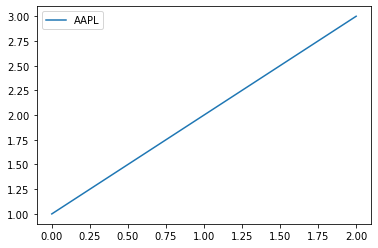

In [33]:
# Panda query parameter to data frame

df = pd.read_sql_query(query, con=engine)
df.plot()

In [34]:
query = """
SELECT AAPL FROM stocks
WHERE AAPL < 3;
"""
apple_df = pd.read_sql_query(query, con=engine)
apple_df

,AAPL
0,1
1,2


In [35]:
query = """
SELECT AAPL FROM stocks
WHERE AAPL = 1 OR AAPL = 3;
"""
df = pd.read_sql_query(query, con=engine)
df

,AAPL
0,1
1,3


In [36]:
# Set the random seed so we all get the same random data
np.random.seed(0)
stocks_dataframe = pd.DataFrame(
    np.random.randint(0, 100, size=(10, 2)),
    columns=["AAPL", "GOOG"]
)

# To view the data, use either the iloc function or the head function.
display(stocks_dataframe.iloc[:3])
display(stocks_dataframe.head(3))

,AAPL,GOOG
0,44,47
1,64,67
2,67,9


,AAPL,GOOG
0,44,47
1,64,67
2,67,9


In [38]:
stocks_dataframe.to_sql('stocks', engine, index=False, if_exists='replace')
query = """
SELECT *
FROM stocks
LIMIT 3;
"""

limit_df = pd.read_sql_query(query, con=engine)
limit_df

,AAPL,GOOG
0,44,47
1,64,67
2,67,9


In [ ]:
query = """
SELECT * FROM stocks
WHERE AAPL < 50
LIMIT 3;
"""

where_limit_df = pd.read_sql_query(query, con=engine)
where_limit_df